# Loading data from Masakhane folder

In [19]:
!pip install pandas keras plot_keras_history  tensorflow

     |██████████████████████████▊     | 438.2 MB 97.0 MB/s eta 0:00:014  |▍                               | 6.5 MB 10.6 MB/s eta 0:00:49     |█                               | 15.1 MB 10.6 MB/s eta 0:00:49             | 135.1 MB 115.4 MB/s eta 0:00:04██████████████▋           | 336.9 MB 80.8 MB/s eta 0:00:03�███████████        | 392.6 MB 80.8 MB/s eta 0:00:02

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 524.1 MB 20 kB/s s eta 0:00:01��███████████▌| 516.7 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 22.9 MB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 63.8 MB/s eta 0:00:01
     |████████████████████████████████| 440 kB 29.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 86.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.2 MB 61.5 MB/s eta 0:00:01�██████████████   | 4.7 MB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.6 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 88.3 MB/s eta 0:00:01
     |██

In [1]:
!pip install sagemaker -U

     |████████████████████████████████| 857 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 104.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 450 kB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 71.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 56.9 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-2.175.0-py2.py3-none-any.whl size=1165569 sha256=bf3a3bd4cbaa736b69ac269482263114303700e76428e09278be0db7fe5e46b9
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/15/a8/3f/a2fea2d992a28d07bbc11e39d5304405200a5dda20ec7913f3
Successfully built sagemaker
  Attempting uninstall: attrs
    Found existing installation: at

In [2]:
from pathlib import Path
import pandas as pd
import boto3
import sagemaker

In [3]:
# Reading folder path
# Context Masahkane community
# Ramshaw and Marcus (1995) = IOB data format

bbj_pos_path = Path('../data_source/masakhane-pos/data/bbj')
dev_data_path   = bbj_pos_path / 'dev.txt'
train_data_path = bbj_pos_path / 'train.txt'
test_data_path  = bbj_pos_path / 'test.txt'


In [8]:
dir(sagemaker.session.Session)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_sagemaker_config_tags',
 '_create_inference_recommendations_job_request',
 '_create_model_request',
 '_create_s3_bucket_if_it_does_not_exist',
 '_gen_s3_model_data_source',
 '_get_auto_ml_request',
 '_get_process_request',
 '_get_train_request',
 '_get_transform_request',
 '_get_tuning_request',
 '_get_update_training_job_request',
 '_initialize',
 '_intercept_create_request',
 '_map_training_config',
 '_map_tuning_config',
 '_map_tuning_objective',
 'account_id',
 'auto_ml',
 'batch_get_record',
 'boto_region_name',
 'compile_model',
 'create_endpoint',
 'create_endpoint_config',
 'create_endpoint_config_from_ex

In [22]:
# current_role = sagemaker.get_execution_role()
# region = boto3.Session().region_name

current_role = "SageMaker-Sangkak"
region = "us-west-2"
bucket = "sangkak-challenge"
prefix = "sagemaker/sangkak-xgboost-spot"

print(f"current_role: {current_role}")
print(f"region: {region}")
print(f"s3 bucket: {bucket}")
print(f"s3 prefix: {prefix}")

current_role: SageMaker-Sangkak
region: us-west-2
s3 bucket: sangkak-challenge
s3 prefix: sagemaker/sangkak-xgboost-spot


In [23]:
container = sagemaker.image_uris.retrieve('xgboost', region, 'latest')
print(container)

433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest


In [40]:
# from auglib import augment_data
# from auglib import read_format_data, list_to_pd_format

# function that read IOB file and build data structure for train, test and dev
def read_format_data(filename):
    sents_id, words, tags_all = [], [], []
    all_extracted_data, only_pos_data, o_pos_data = [], [], []
    with open(filename, encoding='utf-8') as iob:
        sentence, id_sent, tags = [], 1, []
        for line in iob:
            if len(line) > 1:
                word, tag = line.strip().split(' ')
                sentence.append((word, tag))
                sents_id.append(id_sent)
                words.append(word)
                tags_all.append(tag)
                tags.append(tag)
            else:
                if sentence[-1] != '.':
                    sentence.append(('.', 'O'))
                    words.append('.')
                    tags_all.append('O')
                sents_id.append(id_sent)
                all_extracted_data.append(sentence)
                sentence = []
                id_sent += 1
                tags = []
    dataframe = {"sentence_id": sents_id, "word": words, "tag": tags_all}
    pd_pos_data = pd.DataFrame.from_dict(dataframe)
    return all_extracted_data, pd_pos_data, only_pos_data, o_pos_data



In [41]:
# read and extract iob data
extracted_train_data, pd_train_data, only_train_ner_data, o_train_ner_data = read_format_data(train_data_path)
extracted_test_data, pd_test_data, only_test_ner_data, o_test_ner_data = read_format_data(test_data_path)
extracted_dev_data, pd_dev_data, only_dev_ner_data, o_dev_ner_data = read_format_data(dev_data_path)

# quelques stats liminaires
print("Total number of sentences in the train dataset: {:,}".format(pd_train_data["sentence_id"].nunique()))
print("Total words in the train dataset: {:,}".format(pd_train_data.shape[0]))
print("Total number of sentences in the test dataset: {:,}".format(pd_test_data["sentence_id"].nunique()))
print("Total words in the test dataset: {:,}".format(pd_test_data.shape[0]))
print("Total number of sentences in the dev dataset: {:,}".format(pd_dev_data["sentence_id"].nunique()))
print("Total words in the dev dataset: {:,}".format(pd_dev_data.shape[0]))



Total number of sentences in the train dataset: 750
Total words in the train dataset: 12,429
Total number of sentences in the test dataset: 599
Total words in the test dataset: 9,715
Total number of sentences in the dev dataset: 149
Total words in the dev dataset: 2,465


In [28]:
o_train_ner_data

[[('Mwɔ̌ʼ', 'NOUN'),
  ('pfʉ́tə́', 'VERB'),
  ('nə́', 'ADP'),
  ('mwâsi', 'NOUN'),
  ('máp', 'DET'),
  ('yə́', 'DET'),
  ('cwə', 'NOUN'),
  ('Cyəpɔ', 'PROPN'),
  ('Sǐ', 'NOUN'),
  ('kùʼ', 'VERB'),
  ('.', 'O')],
 [('Tə́', 'SCONJ'),
  ('gaə̌', 'PRON'),
  ('kwɛ', 'VERB'),
  ('gaə́', 'SCONJ'),
  ('Moteze', 'PROPN'),
  ('pə́', 'AUX'),
  ('tə', 'PART'),
  ('zhyə̌', 'VERB'),
  ('thə̂', 'NOUN'),
  ('nə', 'PART'),
  ('ntə̂m', 'VERB'),
  ('bə', 'SCONJ'),
  ('jʉɔjʉm', 'ADJ'),
  ('ghɔm', 'NOUN'),
  ('tsyə̂', 'DET'),
  ('gɔ', 'AUX'),
  ('pə́', 'AUX'),
  ('nə́', 'PART'),
  ('lô', 'VERB'),
  ('mhɔ', 'NOUN'),
  ('bíŋ', 'CCONJ'),
  ('gɔm', 'VERB'),
  ('tsʉʼ', 'NOUN'),
  ('yə', 'DET'),
  ('e', 'PRON'),
  ('dwɔʼ', 'VERB'),
  ('mshûʼ', 'NUM'),
  ('shâʼ', 'NUM'),
  ('ŋkâp', 'NOUN'),
  ('guŋ', 'NOUN'),
  ('nə́', 'ADP'),
  ('lə', 'DET'),
  ('.', 'O')],
 [('Mə́kuʼ', 'NOUN'),
  ('dʉmtʉm', 'ADJ'),
  ('Bi', 'PROPN'),
  ('Mvondo', 'PROPN'),
  ('pú', 'PRON'),
  ('ké', 'VERB'),
  ('é', 'PRON'),
  ('gaə

# Analyzing data 

In [9]:
# quantification des tags sur le corpus d'entrainement
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [ ]:

pd_augment_ner_iob_data[pd_augment_ner_iob_data.iob_tag != 'O']["iob_tag"]\
.value_counts().plot(kind="bar", figsize=(20,15))

# On remarque ici que le tag date représente 40% des tags (en position I ou B)

La phrase la plus longue contient 47 mots.
ID de la plus longue phrase est: 4.

La phrase la plus longue du corpus est: 
 Fə̂ é Samuel Mvondo Ayolo gɔ síŋ wɔ́kpə pâʼ a kə́ shyətə tə́ e cyâ é gaə́ é ghɔ́ bá nə̂ e bə e katə kúʼ nə́ nə̂ŋ mghɛcɛ́ Mendize pyə wáp kə̂ shə́ŋ â daʼ nə́ nə̂ pfʉ̌ pfʉ́ m nə̂ bǔ pɔ páp lə .


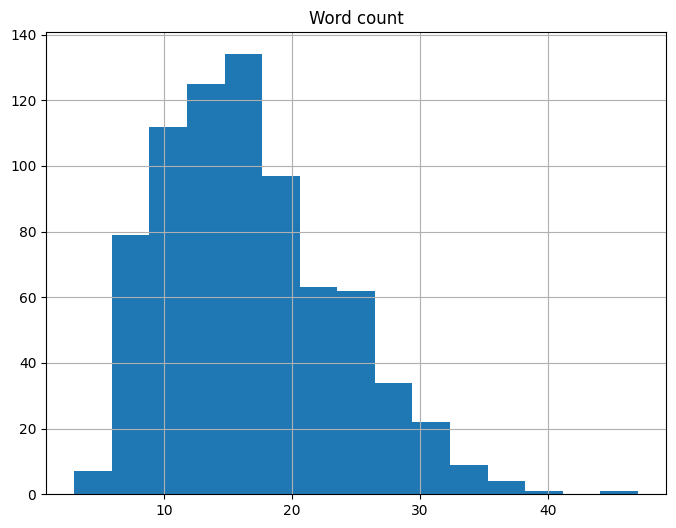

In [12]:

word_counts = pd_train_data.groupby("sentence_id")["word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
word_counts.hist(bins=15, figsize=(8,6))

# On constate que le nombre de mots moyens par phrase est de 15
MAX_LENGTH_SENTENCE = word_counts.max()[0]
print("La phrase la plus longue contient {} mots.".format(MAX_LENGTH_SENTENCE))
longest_sentence_id = word_counts[word_counts["Word count"]==MAX_LENGTH_SENTENCE].index[0]
print("ID de la plus longue phrase est: {}.".format(longest_sentence_id))
longest_sentence = pd_train_data[pd_train_data["sentence_id"]==longest_sentence_id]["word"].str.cat(sep=' ')
print(f"\nLa phrase la plus longue du corpus est: \n {longest_sentence}")


In [13]:
all_words = list(set(pd_train_data["word"].values))
all_tags = list(set(pd_train_data["iob_tag"].values))

print("Nombre de mots uniques: {}".format(pd_train_data["word"].nunique()))
print("Nombre de tags uniques : {}".format(pd_train_data["iob_tag"].nunique()))

Nombre de mots uniques: 2841
Nombre de tags uniques : 16


# Features engineering

In [51]:
# importing features module 
from features import remove_accents, number_tone_word, extract_tone
import string
import re

In [47]:
all_words = list(set(pd_train_data["word"].values))
all_tags = list(set(pd_train_data["tag"].values))

print("Nombre de mots uniques: {}".format(pd_train_data["word"].nunique()))
print("Nombre de tags uniques : {}".format(pd_train_data["tag"].nunique()))

Nombre de mots uniques: 2841
Nombre de tags uniques : 16


In [55]:
# Constructing word features based on tones and API charaters
words_caracters = set([y.lower() for x in all_words for y in x])
all_caracters   = string.punctuation+string.ascii_letters+string.digits+''
tone_caracters  = list(set([x for x in words_caracters if x not in all_caracters]))
cpm_search      = re.compile(str(tone_caracters))

# Set of functions that normalizes and get features from datasets
bantou_tones = [f"{x} " for x in " ́̄̀̌̂" if x != " "]
string_tones = "".join(bantou_tones)
tones_search = re.compile(string_tones)

bantou_letters = string.ascii_letters+"ǝɔᵾɓɨşœɑʉɛɗŋøẅëïə"

non_tone = remove_accents("fə̀fə̀")


In [66]:
from features import sent2features, sent2labels

In [67]:
# Build features from dataset 
print(len(extracted_train_data))

#train_sents = format_data(pd_train_data)
#dev_sents = format_data(pd_dev_data)
train_sents = [[word for word in sentence] for sentence in extracted_train_data]
dev_sents = [[word for word in sentence] for sentence in extracted_dev_data]

Xtrain = [sent2features(s) for s in train_sents]
ytrain = [sent2labels(s) for s in train_sents]

Xdev = [sent2features(s) for s in dev_sents]
ydev = [sent2labels(s) for s in dev_sents]


print(f"Train X aug lenght: {len(Xtrain)} | {len(ytrain)}")
print(f"Dev X aug lenght: {len(Xdev)} | {len(ydev)}")
Xtrain[2]

750
Train X aug lenght: 750 | 750
Dev X aug lenght: 149 | 149


[{'bias': 1.0,
  'word': 'Mə́kuʼ',
  'word.tones': '́ ʼ',
  'word.normalized': 'Mə́kuʼ',
  'word.position': 0,
  'word.has_hyphen': False,
  'word.lower()': 'mə́kuʼ',
  'word.start_with_capital': True,
  'word.have_tone': True,
  'word.ispunctuation': False,
  'word.isdigit()': False,
  'BOS': True,
  '+1:word': 'dʉmtʉm',
  '+1:word.position': 1,
  '+1:word.letters': 'd ʉ m t ʉ m',
  '+1:word.normalized': 'dʉmtʉm',
  '+1:word.start_with_capital': False,
  '+1:len(word2)': 6,
  '+1:word.lower()': 'dʉmtʉm',
  '+1:word.isdigit()': False,
  '+1:word.ispunctuation': False},
 {'bias': 1.0,
  'word': 'dʉmtʉm',
  'word.tones': '',
  'word.normalized': 'dʉmtʉm',
  'word.position': 1,
  'word.has_hyphen': False,
  'word.lower()': 'dʉmtʉm',
  'word.start_with_capital': False,
  'word.have_tone': False,
  'word.ispunctuation': False,
  'word.isdigit()': False,
  '-1:word': 'Mə́kuʼ',
  '-1:word.position': 0,
  '-1:word.letters': 'M ə ́ k u ʼ',
  '-1:word.normalized': 'Mə́kuʼ',
  '-1:word.start_with

In [69]:
from sklearn.preprocessing import OneHotEncoder

Xtrain_boost, ytrain_boost = [], []
X_all = []

for i in Xtrain:
    for a in i:
        X_all.append([[x, y] for x, y in a.items()])

print(X_all[0])
oh_encoder = OneHotEncoder(handle_unknown='ignore')
oh_encoder.fit(X_all)

print(oh_encoder.categories_)

[['bias', 1.0], ['word', 'Mwɔ̌ʼ'], ['word.tones', '̌ ʼ'], ['word.normalized', 'Mwɔ̌ʼ'], ['word.position', 0], ['word.has_hyphen', False], ['word.lower()', 'mwɔ̌ʼ'], ['word.start_with_capital', True], ['word.have_tone', True], ['word.ispunctuation', False], ['word.isdigit()', False], ['BOS', True], ['+1:word', 'pfʉ́tə́'], ['+1:word.position', 1], ['+1:word.letters', 'p f ʉ ́ t ə ́'], ['+1:word.normalized', 'pfʉ́tə́'], ['+1:word.start_with_capital', False], ['+1:len(word2)', 7], ['+1:word.lower()', 'pfʉ́tə́'], ['+1:word.isdigit()', False], ['+1:word.ispunctuation', False]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12429,) + inhomogeneous part.

In [42]:
hyperparameters = {
    "max_depth": "5",
    "eta": "0.2",
    "gamma": "4",
    "min_child_weight": "6",
    "subsample": "0.7",
    "objective": "reg:squarederror",
    "num_round": "50"
}

instance_type = 'ml.m5.2xlarge'
output_path = 's3://{}/{}/{}/output'.format(bucket, prefix, 'abalone-xgb')
content_type = "libsvm"

In [43]:
from sagemaker.xgboost.estimator import XGBoost
from sagemaker.session import Session
from sagemaker.inputs import TrainingInput

In [ ]:
estimator = XGBoost(container=container, 
                    framework_version='1.7-1',
                    hyperparameters=hyperparameters,
                    role=role,
                    instance_count=1,
                    instance_type='ml.m4.2xlarge',
                    output_path=output_path)

# define the data type and paths to the training and validation datasets
content_type = "libsvm"
train_input = TrainingInput("s3://{}/{}/{}/".format(bucket, prefix, 'train'), content_type=content_type)
validation_input = TrainingInput("s3://{}/{}/{}/".format(bucket, prefix, 'validation'), content_type=content_type)
